# Práctica 2: Gestor de Noticias

Equipo 6:

- Andrés Alexis Galvis Herrera
- Juan Esteban Mejía Espejo
- Juan José Zapata Cadavid
- Maria Camila Zapata Arrubla

En primer lugar se descargan los datos desde Kaggle, y se ordenan en la estrucctura de directorios que facilita su manejo

In [1]:
#!/bin/bash
# Descargar el dataset
!curl -L -o ./spanish-news-classification.zip \
  https://www.kaggle.com/api/v1/datasets/download/kevinmorgado/spanish-news-classification

# Crear la carpeta data/raw si no existe
!mkdir -p data/raw

# Descomprimir el archivo en la carpeta data/raw
!unzip ./spanish-news-classification.zip -d data/raw

# Eliminar el archivo zip descargado
!rm ./spanish-news-classification.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100 1409k  100 1409k    0     0   917k      0  0:00:01  0:00:01 --:--:--  917k
The syntax of the command is incorrect.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# Leer el dataset
import pandas as pd

# Leer el archivo de texto
df = pd.read_csv('data/raw/df_total.csv')
df

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion


## Limpieza de datos
A continuación se elimina la columna url, ya que no es de utilidad para el desarrollo que se va a realizar, y además se trata la columna de cuerpo de la noticia.

In [3]:
# borrar la columna url
df = df.drop(columns=['url'])
df.head()

,news,Type
0,Durante el foro La banca articulador empresari...,Otra
1,El regulador de valores de China dijo el domin...,Regulaciones
2,En una industria históricamente masculina como...,Alianzas
3,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,Ayer en Cartagena se dio inicio a la versión n...,Otra


Inicialmente, para evaluar el procesamiento que se le realizará a los datos, observamos los distintos caracteres que se encuentran en el cuerpo de la noticia.

In [4]:
import numpy as np

# Metamos todo eso en una funcion
def get_unique_chars(df):
    # Obtener todos los caracteres únicos
    unique_chars = np.unique(list(''.join(df['news'].values)))
    return unique_chars

# Obtener los caracteres únicos
unique_chars = get_unique_chars(df)
unique_chars

array(['\t', '\n', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')',
       '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', ':', ';', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', '`', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '\xa0', '¡',
       'ª', '\xad', '®', '°', '²', '´', '·', 'º', '¿', 'Á', 'Ä', 'É', 'Í',
       'Ð', 'Ó', 'Ö', 'Ú', 'à', 'á', 'ã', 'ç', 'é', 'ê', 'ë', 'í', 'ñ',
       'ò', 'ó', 'ö', 'ú', 'ü', 'ğ', 'ı', 'Ş', 'ş', '́', 'π', '\u200b',
       '–', '—', '‘', '’', '“', '”', '…', '\u202f', '€', '₿', '™'],
      dtype='<U1')

In [5]:
import re

def clean_text(text):
    """
    Limpia el texto en español realizando los siguientes pasos:
    1. (Opcional) Normaliza el texto para separar los acentos de las letras.
    2. Elimina los caracteres especiales, pero conserva letras acentuadas y la ñ.
    3. Convierte el texto a minúsculas.
    4. Reemplaza múltiples espacios en blanco por uno solo.
    5. Elimina los espacios iniciales y finales.
    """

    # Se conserva la ñ y las vocales acentuadas
    text = re.sub(r"[^a-zA-Z0-9áéíóúüñÁÉÍÓÚÜÑ]", " ", text)
    text = text.lower()
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# aplicar la función clean_text a la columna news
df['news'] = df['news'].apply(clean_text)
df.head()

,news,Type
0,durante el foro la banca articulador empresari...,Otra
1,el regulador de valores de china dijo el domin...,Regulaciones
2,en una industria históricamente masculina como...,Alianzas
3,con el dato de marzo el ipc interanual encaden...,Macroeconomia
4,ayer en cartagena se dio inicio a la versión n...,Otra


In [6]:
# observemos ahora los caracteres únicos
unique_chars = get_unique_chars(df)
unique_chars

array([' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b',
       'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
       'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é',
       'í', 'ñ', 'ó', 'ú', 'ü'], dtype='<U1')

In [7]:
# Extraer los valores únicos de la columna 'Type' manteniendo el orden de aparición
unique_labels = df['Type'].unique()

# Crear el diccionario label2id
label2id = {label: idx for idx, label in enumerate(unique_labels)}

# Mostrar el mapeo
print(label2id)

# Mapear las etiquetas a números en los DataFrames
df['labels'] = df['Type'].map(label2id)

{'Otra': 0, 'Regulaciones': 1, 'Alianzas': 2, 'Macroeconomia': 3, 'Innovacion': 4, 'Sostenibilidad': 5, 'Reputacion': 6}


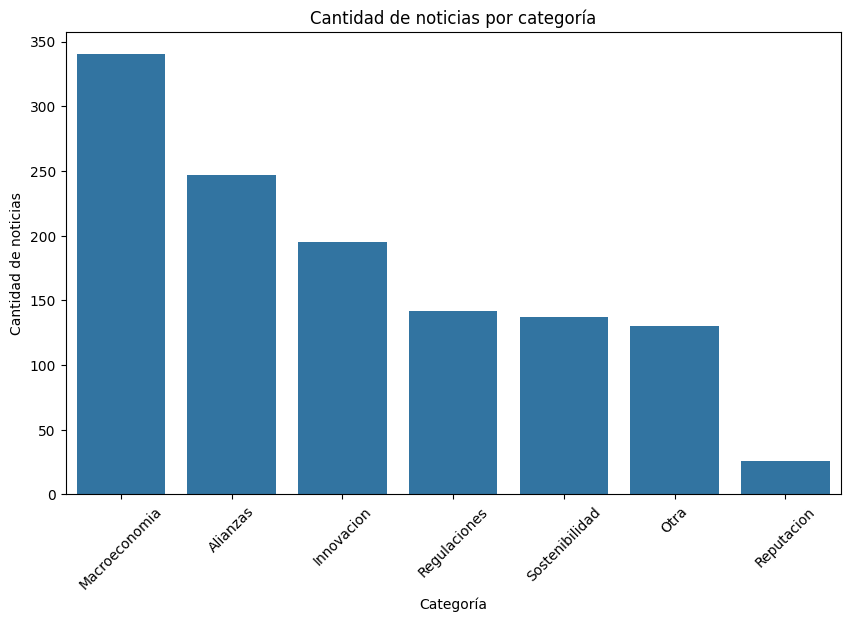

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de noticias por categoría
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Cantidad de noticias por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de noticias')
plt.show()

In [24]:
df["Type"].value_counts()

Type
Macroeconomia     340
Alianzas          247
Innovacion        195
Regulaciones      142
Sostenibilidad    137
Otra              130
Reputacion         26
Name: count, dtype: int64

## Clasificación de Noticias

#### Modelo de clasificación
Luego de tener todas las herramientas necesarias para construir el modelo de clasifiación, se procede a la implementación.

En primer lugar, se importan todas las librerías necesarias, para el modelado

In [7]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
import numpy as np
import random

d:\PREGRADO INGENIERÍA DE SISTEMAS E INFORMÁTICA\2024-2. PLN\trabajo 2\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Se establece una semilla para todos los modulos, y así asegurar que los resultados sean reproducibles en cada ejecución.
Además, se divide el dataset en entrenamientoy validación.

In [ ]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

train_df, val_df = train_test_split(df, test_size=0.1, 
					random_state=seed_val, stratify=df['labels'])

Para el correcto funcionamiento de la librería Pytorch, se define la clase Dataset, que permite preparar y tokenizar el texto de las noticias, y las etiquetas.

In [ ]:
class NewsDataset(Dataset):
    # Método de inicialización: configura el dataset con el DataFrame, 
    # tokenizer y longitud máxima.
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.news = dataframe.news
        self.labels = dataframe.labels
        self.max_len = max_len

    # Retorna el número total de elementos en el dataset.
    def __len__(self):
        return len(self.data)

    # Devuelve un diccionario con el texto de la noticia, 
    # sus IDs tokenizados, la máscara de atención y la etiqueta.
    def __getitem__(self, index):
        news_text = str(self.news.iloc[index])
        label = int(self.labels.iloc[index])
        encoding = self.tokenizer.encode_plus(
            news_text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'news_text': news_text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


Lo siguiente, es cargar tanto el tokenizador, como el modelo de clasifiación, del modelo Bert Multilingüe.

Además, se deben definir parámetros como la longitud maxima de secuencia y tamaño del lote, ya que para el entrenamiento se hace una cargar de datos por lotes.

In [10]:
# Definir el nombre del modelo y cargar el tokenizador y el modelo de clasificación de secuencias
MODEL_NAME = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=df['labels'].nunique())

# Configurar hiperparámetros: longitud máxima de secuencia y tamaño de batch
MAX_LEN = 128
BATCH_SIZE = 16

# Crear datasets de entrenamiento y validación utilizando la clase NewsDataset
train_dataset = NewsDataset(train_df, tokenizer, MAX_LEN)
val_dataset = NewsDataset(val_df, tokenizer, MAX_LEN)

# Crear dataloaders para entrenamiento y validación con sus respectivos samplers
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=BATCH_SIZE)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=BATCH_SIZE)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Debido a que este cuaderno se desarrollo en un entorno de ejecución con unidad de procesamiento gráfico, se selecciona el dispositivo de entrenamiento.


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [12]:
torch.cuda.is_available()

True

Para el entrenamiento, inicialmente se definen el optimizador, y la  cantidad de épocas por las que se va a entrenar.

Finalmente, configuraciones adicionales para el framework sobre el que se trabaja, y el bucle de entrenamiento.

In [ ]:
# Configuración del optimizador, scheduler y parámetros de entrenamiento
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
epochs = 10
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Bucle de entrenamiento a través de cada epoch
for epoch in range(epochs):
    print(f'\n=== Epoch {epoch+1}/{epochs} ===')
    model.train()  # Establece el modelo en modo entrenamiento
    total_train_loss = 0

    # Iteración sobre cada batch del dataloader de entrenamiento
    for batch in train_dataloader:
        # Se reinician los gradientes para evitar acumulación de gradientes de pasos anteriores
        optimizer.zero_grad()

        # Se extraen y mueven los tensores de entrada y etiquetas al dispositivo (CPU/GPU)
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Se realiza la pasada hacia adelante del modelo con los datos del batch,
        # calculando las predicciones y la pérdida en función de las etiquetas reales
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Se acumula la pérdida obtenida para poder calcular la pérdida media al finalizar el epoch
        total_train_loss += loss.item()

        # Se realiza la propagación hacia atrás (backpropagation) para calcular los gradientes
        loss.backward()

        # Evitar gradientes explosivos mediante clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f'Pérdida en entrenamiento para epoch {epoch+1}: {avg_train_loss:.4f}')

d:\PREGRADO INGENIERÍA DE SISTEMAS E INFORMÁTICA\2024-2. PLN\trabajo 2\.venv\lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



=== Epoch 1/10 ===
Pérdida en entrenamiento para epoch 1: 0.9408

=== Epoch 2/10 ===
Pérdida en entrenamiento para epoch 2: 0.7929

=== Epoch 3/10 ===
Pérdida en entrenamiento para epoch 3: 0.6894

=== Epoch 4/10 ===
Pérdida en entrenamiento para epoch 4: 0.6079

=== Epoch 5/10 ===
Pérdida en entrenamiento para epoch 5: 0.5142

=== Epoch 6/10 ===
Pérdida en entrenamiento para epoch 6: 0.4588

=== Epoch 7/10 ===
Pérdida en entrenamiento para epoch 7: 0.3475

=== Epoch 8/10 ===
Pérdida en entrenamiento para epoch 8: 0.2984

=== Epoch 9/10 ===
Pérdida en entrenamiento para epoch 9: 0.2760

=== Epoch 10/10 ===
Pérdida en entrenamiento para epoch 10: 0.2493


Una vez entrenado el modelo, se calculan las métricas objetivo, y la matriz de confusión para el set de validación.

In [ ]:
# Se configura el modelo en modo evaluación para desactivar funciones como dropout
model.eval()
all_preds = []
all_labels = []
total_val_loss = 0

# Se realiza la evaluación sin calcular gradientes para optimizar el rendimiento
with torch.no_grad():

    # Se itera sobre cada lote del conjunto de validación
    for batch in val_dataloader:

        # Se transfieren los datos (inputs, máscaras y etiquetas) al dispositivo de cómputo
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Se realiza la inferencia y se obtienen la pérdida y las salidas del modelo
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        total_val_loss += loss.item()

        # Se calculan las predicciones y se almacenan para el análisis posterior
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
# Se calculan las métricas de evaluación a partir de los resultados obtenidos
avg_val_loss = total_val_loss / len(val_dataloader)
accuracy_val = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
precision = precision_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

# Se muestran los resultados finales de la evaluación
print("\n=== Evaluación Final en el Set de Validación ===")
print(f'Pérdida en validación: {avg_val_loss:.4f}')
print(f'Accuracy: {accuracy_val:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')


=== Evaluación Final en el Set de Validación ===
Pérdida en validación: 0.7786
Accuracy: 0.8443
F1 Score: 0.8433
Recall: 0.8443
Precision: 0.8509


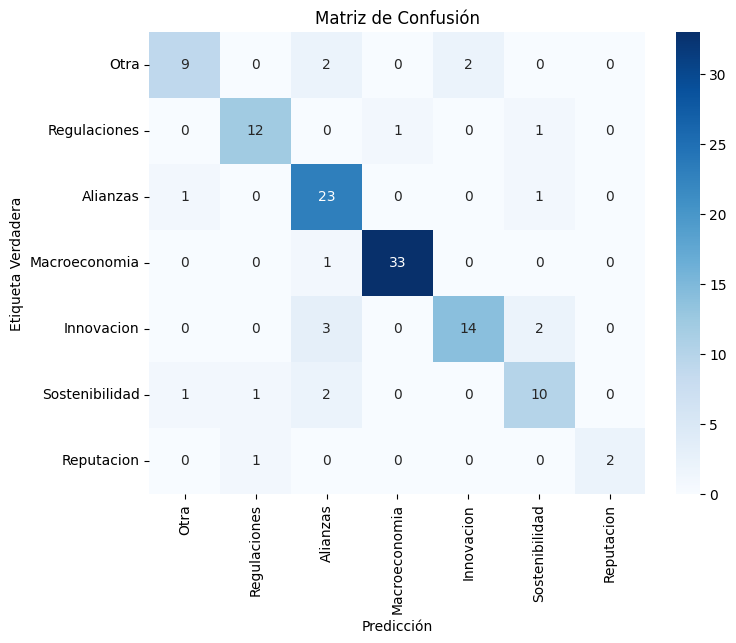

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_df = pd.DataFrame(conf_matrix, index=unique_labels, columns=unique_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.show()


#### Conclusiones

1. **Buen rendimiento general y alta precisión**  
   El modelo muestra un desempeño sólido con un Accuracy cercano al 85% y un F1 Score de 0.84, lo que indica que, en términos generales, clasifica correctamente la mayoría de las noticias. La precisión (0.8654) sugiere que, cuando el modelo predice una clase, suele acertar.

2. **Clases mayoritarias mejor identificadas**  
   En la matriz de confusión se ve que las clases con más ejemplos (como “Macroeconomia” y “Alianzas”) tienden a ser reconocidas con mayor exactitud, acumulando un mayor número de aciertos. Esto indica que el modelo aprende mejor las categorías con más datos de entrenamiento.

3. **Áreas de confusión en clases similares o con pocos ejemplos**  
   Algunas clases, como “Innovacion” o “Reputacion”, presentan más confusiones (posiblemente por menos datos o cercanía semántica con otras categorías). Esto sugiere que, para seguir mejorando, convendría aumentar o equilibrar el número de ejemplos en estas categorías.

In [ ]:
!mkdir -p models/cat/model
!mkdir -p models/cat/tokenizer

In [ ]:
# 1. Crear directorios
import os
import json

os.makedirs('models/cat/model', exist_ok=True)
os.makedirs('models/cat/tokenizer', exist_ok=True)


# 2. Guardar el modelo entrenado
model.save_pretrained('models/cat/model')

# 3. Guardar el tokenizador
tokenizer.save_pretrained('models/cat/tokenizer')

# 4. Guardar el mapeo de etiquetas
with open('models/cat/label_mapping.json', 'w', encoding='utf-8') as f:
    json.dump(label2id, f, ensure_ascii=False, indent=2)

## Resumen Abstractivo de Noticias

A partir del mismo conjunto de datos usado para la clasificación de noticias, y la misma limpieza, se procede a desarrollar el resumen de noticias usando un modelo transformer pre-entreado de HuggingFace

Primero, se importan todos los paquetes adicionales necesarios:

In [9]:
# Importar las bibliotecas necesarias
from transformers import pipeline, AutoTokenizer
from rouge_score import rouge_scorer

d:\PREGRADO INGENIERÍA DE SISTEMAS E INFORMÁTICA\2024-2. PLN\trabajo 2\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Modelado

Se usará el modelo _Spanish BERT2BERT (BETO) fine-tuned on MLSUM ES for summarization_ es cual está basado en BETO, un modelo de basado en BERT entrenado en un corpus de español; el modelo usado es multilengua, entrenado en un conjunto de datos que contiene más de 1.5 millones de artículos/resúmenes en Francés, Alemán, Español, Ruso y Turco.

In [10]:
# Cargar el tokenizer preentrenado para el modelo de resumen en español
tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")

# Cargar el pipeline de resumen utilizando el modelo y tokenizer preentrenados
summarizer = pipeline("summarization", model="mrm8488/bert2bert_shared-spanish-finetuned-summarization", tokenizer=tokenizer)

Config of the encoder: <class 'transformers.models.bert.modeling_bert.BertModel'> is overwritten by shared encoder config: BertConfig {
  "_name_or_path": "dccuchile/bert-base-spanish-wwm-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.49.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31002
}

Config of the decoder: <class 'transformers.models.bert.modeling_bert.BertLMHeadModel'> is overwritten by shared decoder config: BertConfig {
  "_name_or_path

Lo siguiente es definir una función para resumir texto utilizando el pipeline. Haremos que la longitud máxima sea de 130 caracteres y la longitud mínima de 30.

In [12]:
# Definir una función para resumir el texto utilizando el pipeline de resumen
def summarize_text(text):
    summary = summarizer(text, max_length=130, min_length=30, do_sample=False)
    return summary[0]['summary_text']

Para poder aplicar el Pipeline es necesario truncar el texto a la longitud máxima que este soporta.

In [11]:
def truncate_text(text, tokenizer, max_length):
	tokens = tokenizer.encode(text, add_special_tokens=False)
	if len(tokens) > max_length:
		tokens = tokens[:max_length]
	return tokenizer.decode(tokens, clean_up_tokenization_spaces=True)

In [13]:
# Aplicar la función summarize_text a la columna news
df['news_truncated'] = df['news'].apply(lambda x: truncate_text(x, tokenizer, 510))
df['summary'] = df['news_truncated'].apply(summarize_text)
df.head()

Token indices sequence length is longer than the specified maximum sequence length for this model (560 > 512). Running this sequence through the model will result in indexing errors
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Your max_length is set to 130, but your input_length is only 120. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)
Your max_length is set to 130, but your input_length is only 2. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)
Your max_length is set to 130, but your input_length is only 106. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, 

,news,Type,labels,news_truncated,summary
0,durante el foro la banca articulador empresari...,Otra,0,durante el foro la banca articulador empresari...,El director de sostenibilidad y clientes globa...
1,el regulador de valores de china dijo el domin...,Regulaciones,1,el regulador de valores de china dijo el domin...,El regulador de valores de China afirma que ex...
2,en una industria históricamente masculina como...,Alianzas,2,en una industria históricamente masculina como...,En una industria históricamente masculina como...
3,con el dato de marzo el ipc interanual encaden...,Macroeconomia,3,con el dato de marzo el ipc interanual encaden...,La inflación se sitúa en 22 puntos por debajo ...
4,ayer en cartagena se dio inicio a la versión n...,Otra,0,ayer en cartagena se dio inicio a la versión n...,"El presidente de bbva colombia, presidente de ..."


Guardamos los datos.

In [ ]:
!mkdir -p data/interim

In [ ]:
df.to_csv('data/interim/df_summarized.csv', index=False)

Finalmente, se crea una función para evaluar las métricas ROUGE.

In [14]:
# Crear una función para calcular las métricas ROUGE
def evaluate_summary(df, reference_column, summary_column):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
    
    for ref, summary in zip(df[reference_column], df[summary_column]):
        score = scorer.score(ref, summary)
        scores['rouge1'].append(score['rouge1'].fmeasure)
        scores['rouge2'].append(score['rouge2'].fmeasure)
        scores['rougeL'].append(score['rougeL'].fmeasure)

    # Calcular el promedio de las métricas
    avg_scores = {metric: sum(values) / len(values) for metric, values in scores.items()}
    return avg_scores

In [15]:
# Evaluar la calidad del resumen
avg_scores = evaluate_summary(df, 'news', 'summary')
print("ROUGE scores:", avg_scores)

ROUGE scores: {'rouge1': 0.14980686588718545, 'rouge2': 0.13090613057213402, 'rougeL': 0.1384385150960561}


Los valores de las métricas **ROUGE** obtenidos son:  

- **ROUGE-1**: 0.1498  
- **ROUGE-2**: 0.1309  
- **ROUGE-L**: 0.1384  

### Interpretación

1. **ROUGE-1 (14.98%)**: Evalúa la coincidencia de palabras individuales entre las noticias originales y sus resúmenes. Un valor bajo sugiere que hay poca coincidencia de palabras clave entre ambos textos.  

2. **ROUGE-2 (13.09%)**: Mide la coincidencia de pares de palabras consecutivas (*bigrams*). Un valor bajo indica que los resúmenes no están capturando bien frases clave de las noticias originales.  

3. **ROUGE-L (13.84%)**: Evalúa la coincidencia en la secuencia más larga de palabras coincidentes. Un puntaje bajo indica que la estructura y coherencia del resumen respecto al texto original podrían mejorar.  

### Conclusiones

Los puntajes ROUGE obtenidos son relativamente bajos. Esto indica que los resúmenes generados no están reflejando fielmente el contenido de las noticias originales.

## Identificación de Temas en Noticias

In [12]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ------------ --------------------------- 3.9/12.9 MB 33.4 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 44.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


Lo primero es importar los paquetes necesarios.

In [13]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy
from sklearn.metrics import confusion_matrix, classification_report

# Descargar recursos necesarios de NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar spaCy para español
nlp = spacy.load('es_core_news_sm')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Trabajaremos a partir del mismo conjunto de datos de noticias con la limpieza inicial.

### Preprocesamiento

Comencemos definiendo un preprocesamiento que consistirá de:
- Toenización: Separación del texto en unidades lingüísticas básicas (tokens) utilizando NLTK.
- Eliminación de stopwords: Remoción de palabras frecuentes en español que no aportan significado semántico relevante.
- Lematización con spaCy: Reducción de palabras a su forma base o lema, eligiendo este método sobre el stemming por su precisión lingüística.
- Filtrado por longitud: Eliminación de palabras con menos de 3 caracteres para reducir ruido.
- Filtrado por frecuencia: Implementación de un filtrado basado en percentiles (entre 5% y 95%) para eliminar términos demasiado raros o excesivamente comunes.

Se optó por la lematización utilizando spaCy por su capacidad para producir formas base lingüísticamente correctas, preservando el significado semántico, especialmente importante para el español que tiene una morfología compleja.

Por otro lado, la elección de palabras con más de 2 caracteres busca eliminar tokens sin valor semántico sustancial mientras se preservan palabras cortas pero significativas en español; mientras que el fltrado por frecuencia basado en percentiles garantiza la adaptabilidad a diferentes corpus, eliminando palabras extremadamente raras (posibles errores o términos muy específicos) y palabras demasiado comunes que no aportan a la diferenciación temática.

In [14]:
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lematización usando spaCy
    doc = nlp(' '.join(tokens))
    lemmas = [token.lemma_ for token in doc]
    
    # Filtrar palabras por longitud
    lemmas = [lemma for lemma in lemmas if len(lemma) > 2]
    
    return lemmas

def filter_by_frequency(texts, min_freq=5, max_freq=95):
    # Contar frecuencias de palabras
    word_counts = Counter([word for text in texts for word in text])
    
    # Definir umbrales basados en percentiles
    freqs = list(word_counts.values())
    min_freq = np.percentile(freqs, min_freq)
    max_freq = np.percentile(freqs, max_freq)
    
    # Filtrar palabras por frecuencia
    filtered_texts = []
    for text in texts:
        filtered = [word for word in text 
					if min_freq <= word_counts[word] <= max_freq]
        filtered_texts.append(filtered)
    
    return filtered_texts

### Modelado con LDA

Pasando a hora al modelado de temas con LDA, implementaremos lo siguiente:

- Análisis de frecuencias de palabras: Visualización de la distribución de frecuencias para entender el vocabulario del corpus.
- Búsqueda del número óptimo de temas: Evaluación iterativa de modelos LDA con diferentes números de temas (4-7), utilizando métricas de coherencia c_v y u_mass. Se definió este rango considerando el número original de categorías en el dataset (7) y buscando un balance entre especificidad y generalización.
- Entrenamiento del modelo final: Implementación del modelo LDA con el número óptimo de temas determinado por la coherencia c_v.
- Extracción de palabras clave: Identificación de los términos más representativos de cada tema descubierto.

Además, configurar el modelo con 10 pases para asegurar la convergencia y se fijó una semilla aleatoria (42) para garantizar la reproducibilidad de los resultados.

In [15]:
def analyze_word_frequencies(texts):
    # Contar todas las palabras
    word_counts = Counter([word for text in texts for word in text])
    
    # Crear DataFrame con frecuencias
    freq_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['frequency'])
    freq_df.sort_values('frequency', ascending=False, inplace=True)
    
    # Visualizar distribución
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(freq_df)), freq_df['frequency'])
    plt.title('Distribución de Frecuencias de Palabras')
    plt.xlabel('Rango de Palabra')
    plt.ylabel('Frecuencia')
    plt.yscale('log')
    plt.show()
    
    return freq_df

In [16]:
def find_optimal_topics(texts, start=2, limit=10, step=1):
    coherence_scores = []
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    for num_topics in range(start, limit + 1, step):
        lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                                    random_state=42, passes=10)

        # Calcular diferentes métricas de coherencia
        coherence_cv = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
        coherence_umass = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='u_mass').get_coherence()

        coherence_scores.append((num_topics, coherence_cv, coherence_umass))
        print(f'Num topics: {num_topics}, Coherence c_v: {coherence_cv}, Coherence u_mass: {coherence_umass}')

    # Graficar coherencias
    num_topics_list, cv_scores, umass_scores = zip(*coherence_scores)
    
    plt.figure(figsize=(10, 5))
    plt.plot(num_topics_list, cv_scores, marker='o', label='Coherence c_v')
    plt.plot(num_topics_list, umass_scores, marker='s', label='Coherence u_mass')
    plt.xlabel('Número de temas')
    plt.ylabel('Coherencia')
    plt.legend()
    plt.title('Coherencia vs Número de Temas')
    plt.show()

    return coherence_scores

In [17]:
def train_lda_model(texts, num_topics):
    # Crear diccionario y corpus
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    # Entrenar modelo LDA
    lda_model = models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10
    )
    
    # Calcular coherencia
    coherence_model = CoherenceModel(
        model=lda_model, 
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()
    
    return lda_model, dictionary, corpus, coherence_score

### Asignación y Visualización de Temas

Pasando ahora a la asignación y visualización de los temas, además de una evaluación, implementaremos tres funciones:
- Visualización de distribución de temas: Representación mediante heatmaps de la distribución de temas por documento.
- Estadísticas de asignación: Análisis de la cantidad de documentos asignados a cada tema.
- Evaluación de correspondencia con categorías originales: Análisis de la relación entre los temas descubiertos automáticamente y las categorías predefinidas mediante matrices de confusión.

Para cada documento se asigna el tema con mayor probabilidad, simplificando la interpretación de resultados.

In [18]:
def assign_topics(lda_model, corpus):
    # Asignar temas a cada documento
    doc_topics = []
    for doc in corpus:
        topics = lda_model.get_document_topics(doc)
        # Obtener el tema más probable
        main_topic = max(topics, key=lambda x: x[1])[0]
        doc_topics.append(main_topic)
    
    return doc_topics

def print_topics(lda_model, num_words=10):
    for idx, topic in lda_model.print_topics(-1, num_words):
        print(f'Tema {idx}:')
        # Extraer y mostrar palabras clave
        words = [(word.split('*')[1].strip().replace('"','')) 
                for word in topic.split(' + ')]
        print(', '.join(words))
        print()

In [19]:
def visualize_topic_distribution(lda_model, corpus, df):
    # Obtener distribución de temas para cada documento
    doc_topics = []
    for doc in corpus:
        topic_dist = lda_model.get_document_topics(doc)
        doc_topics.append([dist[1] for dist in sorted(topic_dist)])
    
    # Crear matriz de distribución
    topic_matrix = pd.DataFrame(doc_topics)
    
    # Visualizar heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(topic_matrix, cmap='YlOrRd')
    plt.title('Distribución de Temas por Documento')
    plt.xlabel('Tema')
    plt.ylabel('Documento')
    plt.show()
    
    # Mostrar estadísticas
    print("\nEstadísticas de asignación de temas:")
    topic_counts = df['predicted_topic'].value_counts()
    print(topic_counts)

In [20]:
def evaluate_topics(df, doc_topics):
    if 'labels' in df.columns:
        # Crear matriz de confusión
        cm = confusion_matrix(df['labels'], doc_topics)
        
        # Visualizar matriz de confusión
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Matriz de Confusión')
        plt.ylabel('Etiquetas Reales')
        plt.xlabel('Temas Predichos')
        plt.show()
        
        # Mostrar métricas de clasificación
        print("\nInforme de Clasificación:")
        print(classification_report(df['labels'], doc_topics))

### Categorización Automática

Por último, se crea una función que nos permita hacer una clasificación automática.

In [21]:
def classify_new_text(text, lda_model, dictionary):
    # Preprocesar el nuevo texto
    processed_text = preprocess_text(text)
    
    # Convertir a bow
    bow = dictionary.doc2bow(processed_text)
    
    # Obtener distribución de temas
    topic_dist = lda_model.get_document_topics(bow)
    
    # Obtener tema más probable
    main_topic = max(topic_dist, key=lambda x: x[1])[0]
    
    return main_topic

Número de valores nulos en 'news': 0

Análisis de frecuencias de palabras:


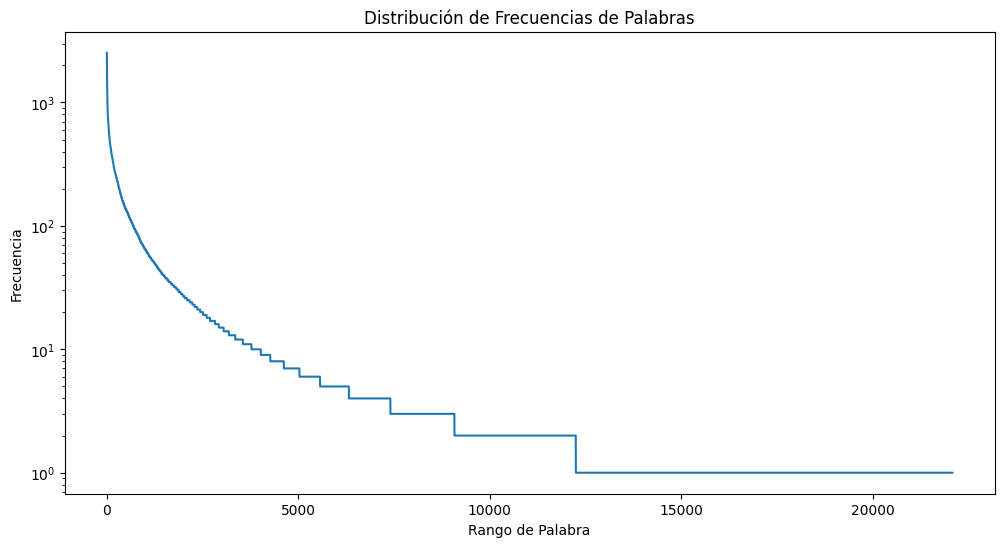


Palabras más frecuentes:
           frequency
poder           2531
bbva            2527
año             2240
banco           1561
país            1524
empresa         1410
inflación       1404
nuevo           1292
hacer           1257
precio          1247
Num topics: 4, Coherence c_v: 0.5295385138525236, Coherence u_mass: -13.92841453626469
Num topics: 5, Coherence c_v: 0.5209584086345689, Coherence u_mass: -13.726706504731817
Num topics: 6, Coherence c_v: 0.5275677379714638, Coherence u_mass: -14.062269581359383
Num topics: 7, Coherence c_v: 0.5615521284077696, Coherence u_mass: -14.544053043854708


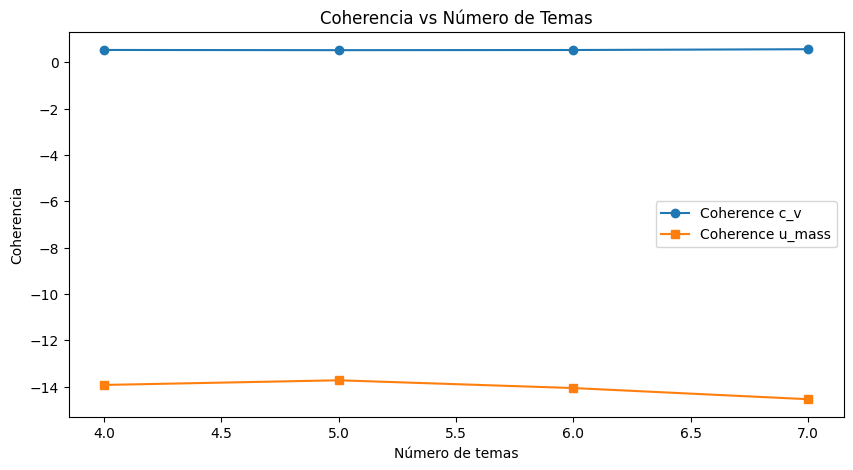


Número óptimo de temas: 7

Palabras clave por tema:
Tema 0:
next, vasco, vidrio, diferencial, tonelada, bilbao, cobre, rappi, voto, escuela

Tema 1:
aéreo, latam, taxi, hidrógeno, automóvil, rodríguez, sostener, ruso, junta, airlín

Tema 2:
bebido, división, scotiabank, colpatrio, rubro, allianz, alcohólico, reporte, carne, papa

Tema 3:
scaleups, smith, privacidad, sintético, leadwind, creg, learning, cannabis, index, machine

Tema 4:
tensión, debt, contaminante, docente, dinámica, filtro, ronda, potable, cine, concentración

Tema 5:
nuclear, singapur, trámite, tributario, remesa, hidráulico, eólico, banxico, vegetal, carbón

Tema 6:
cuántico, garanti, temperatura, reacondicionado, híbrido, minero, lira, computación, ciberseguridad, causa


Distribución de temas:


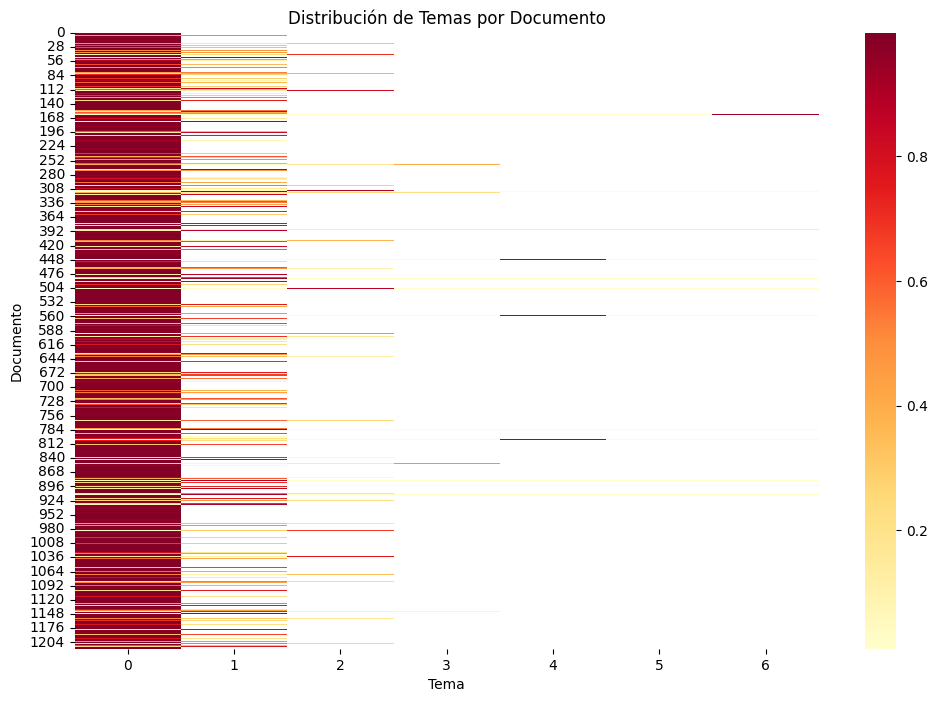


Estadísticas de asignación de temas:
predicted_topic
2    222
1    175
0    174
6    171
3    168
4    159
5    148
Name: count, dtype: int64

Evaluación del modelo:


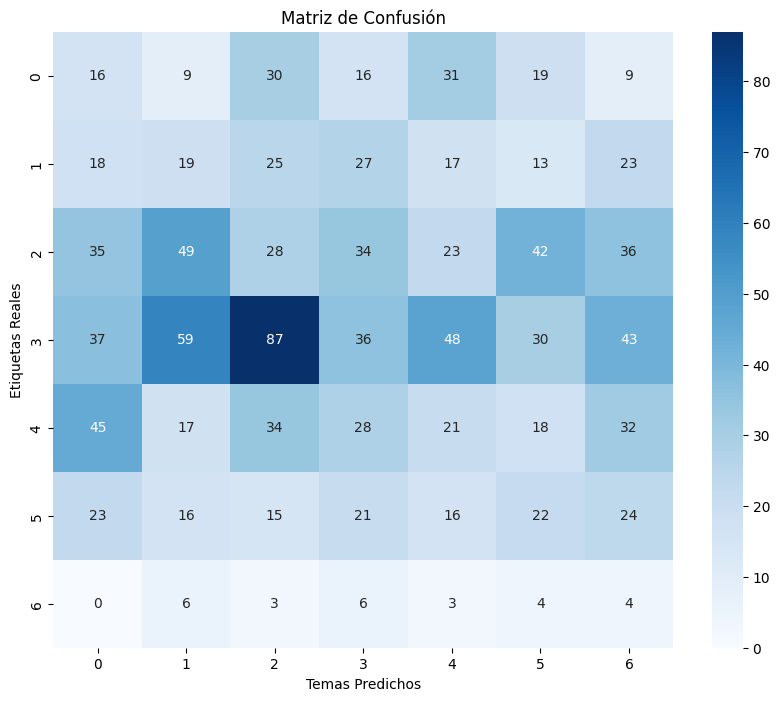


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.09      0.12      0.11       130
           1       0.11      0.13      0.12       142
           2       0.13      0.11      0.12       247
           3       0.21      0.11      0.14       340
           4       0.13      0.11      0.12       195
           5       0.15      0.16      0.15       137
           6       0.02      0.15      0.04        26

    accuracy                           0.12      1217
   macro avg       0.12      0.13      0.11      1217
weighted avg       0.15      0.12      0.13      1217



In [22]:
# Verificar valores nulos
print("Número de valores nulos en 'news':", df['news'].isnull().sum())
df = df.dropna(subset=['news'])

# Preprocesar textos
processed_texts = [preprocess_text(text) for text in df['news']]

# Analizar frecuencias de palabras
print("\nAnálisis de frecuencias de palabras:")
freq_df = analyze_word_frequencies(processed_texts)
print("\nPalabras más frecuentes:")
print(freq_df.head(10))

# Filtrar textos
filtered_texts = filter_by_frequency(processed_texts)

# Encontrar número óptimo de temas
coherence_scores = find_optimal_topics(filtered_texts, start=4,limit=7, step=1)

# Entrenar modelo final
optimal_topics = coherence_scores.index(max(coherence_scores)) + 4
print(f"\nNúmero óptimo de temas: {optimal_topics}")
lda_model, dictionary, corpus, coherence = train_lda_model(filtered_texts, optimal_topics)

# Asignar y visualizar temas
doc_topics = assign_topics(lda_model, corpus)
df['predicted_topic'] = doc_topics

print("\nPalabras clave por tema:")
print_topics(lda_model)

print("\nDistribución de temas:")
visualize_topic_distribution(lda_model, corpus, df)

# Evaluar contra etiquetas reales
print("\nEvaluación del modelo:")
evaluate_topics(df, doc_topics)

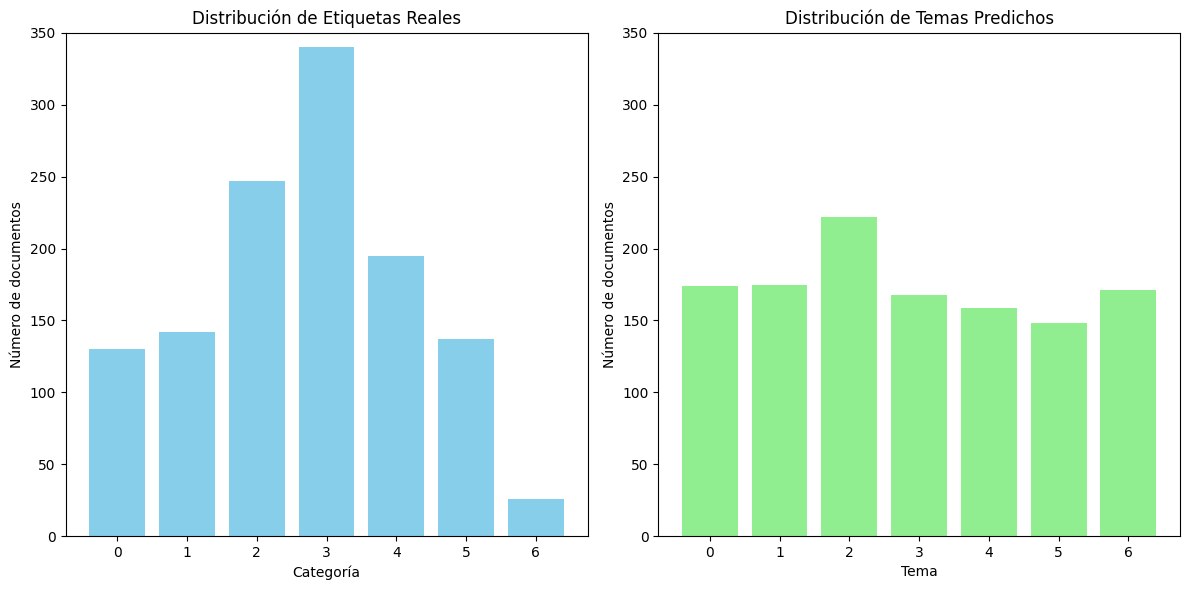

In [25]:
# Crear una gráfica comparando etiquetas reales vs predichas
plt.figure(figsize=(12,6))

# Crear dos subplots separados
plt.subplot(1, 2, 1)
real_counts = df['labels'].value_counts().sort_index()
plt.bar(range(len(real_counts)), real_counts.values, color='skyblue')
plt.title('Distribución de Etiquetas Reales')
plt.xlabel('Categoría')
plt.ylabel('Número de documentos')
plt.xticks(range(len(real_counts)))
plt.ylim(0, max(real_counts.values) + 10)

plt.subplot(1, 2, 2)
pred_counts = df['predicted_topic'].value_counts().sort_index()
plt.bar(range(len(pred_counts)), pred_counts.values, color='lightgreen')
plt.title('Distribución de Temas Predichos')
plt.xlabel('Tema')
plt.ylabel('Número de documentos')
plt.xticks(range(len(pred_counts)))
plt.ylim(0, max(real_counts.values) + 10)


plt.tight_layout()
plt.show()

In [28]:
import os
os.makedirs('models/lda/', exist_ok=True)

In [ ]:
# Guardar el modelo LDA y el diccionario
lda_model.save('models/lda/lda_model')
dictionary.save('models/lda/dictionary')

### Interpretación

**Coherencia del Modelo:**
El análisis de coherencia mostró que el modelo con 7 temas obtuvo el mejor resultado con una coherencia c_v de 0.562, superior a las configuraciones con 4, 5 y 6 temas. Curiosamente, este número coincide con la cantidad de categorías originales del dataset, lo que sugiere que el modelo LDA logró capturar una estructura temática similar a la clasificación humana.

**Interpretación de Temas:**
Los temas descubiertos muestran agrupaciones semánticas interesantes:
- Tema 0: Parece relacionado con industria y economía regional (términos como "vasco", "vidrio", "tonelada", "bilbao").
- Tema 1: Orientado al transporte y movilidad ("aéreo", "latam", "taxi", "hidrógeno", "automóvil").
- Tema 2: Relacionado con banca y finanzas ("scotiabank", "colpatrio", "allianz").
- Tema 3: Tecnología y startups ("scaleups", "leadwind", "learning", "machine").
- Tema 4: Temas sociales y medioambientales ("tensión", "contaminante", "docente").
- Tema 5: Energía y recursos ("nuclear", "hidráulico", "eólico", "carbón").
- Tema 6: Tecnología avanzada y seguridad ("cuántico", "computación", "ciberseguridad").

Esta distribución muestra cierta correspondencia con las categorías originales, donde los temas descubiertos pueden relacionarse con Macroeconomía (temas 0 y 2), Innovación (temas 3 y 6), Sostenibilidad (temas 4 y 5) y Alianzas (tema 1).

**Distribución de Documentos por Tema:**
La asignación de documentos a temas resultó relativamente equilibrada:
- Tema 2: 222 documentos
- Tema 1: 175 documentos
- Tema 0: 174 documentos
- Tema 6: 171 documentos
- Tema 3: 168 documentos
- Tema 4: 159 documentos
- Tema 5: 148 documentos

Esta distribución balanceada sugiere que el modelo LDA ha encontrado una estructura temática significativa y bien diferenciada en el corpus.

### Conclusiones

- Efectividad del modelado LDA: El algoritmo LDA demuestra ser efectivo para descubrir la estructura temática subyacente en noticias en español, identificando agrupaciones coherentes y semánticamente interpretables.
- Correspondencia con categorías predefinidas: Existe una correlación parcial entre los temas descubiertos automáticamente y las categorías originales, lo que valida tanto la aproximación no supervisada como la clasificación manual inicial.
- Importancia del preprocesamiento: Las decisiones de preprocesamiento, especialmente la lematización y el filtrado por frecuencia, resultan cruciales para la calidad final del modelo de temas.
- Valor de las métricas de coherencia: La coherencia c_v se confirma como un indicador útil para determinar el número óptimo de temas, proporcionando una guía objetiva para esta decisión crítica.

# Interfaz Interactiva

In [1]:
import gradio as gr
import pandas as pd
import json
import torch
import chardet

# Módulos para resumen abstractivo
from transformers import BertForSequenceClassification, BertTokenizer, AutoTokenizer, pipeline

# Módulos para identificación de temas
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import numpy as np
from gensim import corpora, models
from gensim.models import CoherenceModel

# Cargar modelo spaCy para lematización en español
nlp = spacy.load('es_core_news_sm')

######################################
### MODELO DE CATEGORIZACIÓN
######################################
# 1. Cargar el mapeo de etiquetas
with open('models/cat/label_mapping.json', 'r', encoding='utf-8') as f:
    label2id = json.load(f)
    id2label = {v: k for k, v in label2id.items()}

# 2. Cargar el modelo y tokenizador de categorización
cat_model = BertForSequenceClassification.from_pretrained('models/cat/model', num_labels=len(label2id))
cat_tokenizer = BertTokenizer.from_pretrained('models/cat/tokenizer')

# 3. Configurar dispositivo y modo evaluación
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cat_model = cat_model.to(device)
cat_model.eval()

def predict_news(text):
    encoded = cat_tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    input_ids = encoded['input_ids'].to(device)
    attention_mask = encoded['attention_mask'].to(device)
    with torch.no_grad():
        outputs = cat_model(input_ids=input_ids, attention_mask=attention_mask)
        prediction = torch.argmax(outputs.logits, dim=1)
    return id2label[prediction.item()]

######################################
### MODELO DE RESUMEN ABSTRACTIVO
######################################
# Cargar tokenizer y pipeline para resumen en español
summarizer_tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")
summarizer = pipeline("summarization",
                        model="mrm8488/bert2bert_shared-spanish-finetuned-summarization",
                        tokenizer=summarizer_tokenizer)

def summarize_text(text):
    summary = summarizer(text, max_length=130, min_length=30, do_sample=False)
    return summary[0]['summary_text']

def truncate_text(text, tokenizer, max_length):
    tokens = tokenizer.encode(text, add_special_tokens=False)
    if len(tokens) > max_length:
        tokens = tokens[:max_length]
    return tokenizer.decode(tokens, clean_up_tokenization_spaces=True)

######################################
### IDENTIFICACIÓN DE TEMAS CON LDA
######################################
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    # Convertir a minúsculas y eliminar stopwords
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # Lematización con spaCy
    doc = nlp(' '.join(tokens))
    lemmas = [token.lemma_ for token in doc]
    # Filtrar palabras cortas
    lemmas = [lemma for lemma in lemmas if len(lemma) > 2]
    return lemmas

# Cargar el modelo LDA y el diccionario previamente entrenados
lda_model = models.LdaModel.load('models/lda/lda_model')
dictionary = corpora.Dictionary.load('models/lda/dictionary')

def identificar_temas(df):
    if "Contenido" not in df.columns:
        return "La columna 'Contenido' no se encuentra en el archivo."
    # Preprocesar cada noticia
    df["processed"] = df["Contenido"].apply(preprocess_text)
    # Convertir cada documento a BOW usando el diccionario cargado
    df["bow"] = df["processed"].apply(lambda tokens: dictionary.doc2bow(tokens))
    # Asignar el tema más probable a cada noticia
    def get_main_topic(bow):
        topics = lda_model.get_document_topics(bow)
        if topics:
            return max(topics, key=lambda x: x[1])[0]
        else:
            return None
    df["predicted_topic"] = df["bow"].apply(get_main_topic)
    
    # Crear un diccionario que mapea el número del tema a una descripción con sus palabras clave
    topics_mapping = {}
    topics = lda_model.print_topics(num_words=10)
    for idx, topic in topics:
        words = [word.split('*')[1].strip().replace('"','') for word in topic.split(' + ')]
        topics_mapping[idx] = ', '.join(words)
    
    # Agregar columna con la descripción del tema
    df["Tema_descripcion"] = df["predicted_topic"].apply(lambda x: topics_mapping.get(x, "N/A"))
    return df[['Contenido', 'predicted_topic', 'Tema_descripcion']].rename(columns={'predicted_topic': 'Tema', 'Tema_descripcion': 'Descripción'})

def mostrar_temas_corpus():
    """
    Retorna un DataFrame con cada tema y sus palabras clave.
    """
    topics = lda_model.print_topics(num_words=10)
    data = []
    for idx, topic in topics:
        words = [word.split('*')[1].strip().replace('"','') for word in topic.split(' + ')]
        data.append({"Tema": f"Tema {idx}", "Palabras Clave": ", ".join(words)})
    df_topics = pd.DataFrame(data)
    return df_topics

######################################
### FUNCIONES DE LECTURA Y PROCESAMIENTO
######################################
def cargar_noticias(archivo):
    """
    Lee archivos CSV o TXT sin encabezado.
    Se detecta la codificación para evitar errores de decodificación.
    Cada línea se considera el contenido de una noticia.
    """
    try:
        with open(archivo.name, 'rb') as f:
            rawdata = f.read()
        result = chardet.detect(rawdata)
        encoding = result['encoding']
        df = pd.read_csv(archivo.name, header=None, encoding=encoding)
    except Exception as e:
        return f"Error al leer el archivo: {str(e)}"
    # Si hay más de una columna, concatenarlas; de lo contrario, asignar el nombre 'Contenido'
    if df.shape[1] > 1:
        df["Contenido"] = df.astype(str).agg(" ".join, axis=1)
    else:
        df.columns = ["Contenido"]
    return df

def obtener_categorias(df):
    if "Contenido" not in df.columns:
        return "La columna 'Contenido' no se encuentra en el archivo."
    df["Categoría"] = df["Contenido"].apply(lambda x: predict_news(str(x)))
    return df

def generar_resumen(df):
    if "Contenido" not in df.columns:
        return "La columna 'Contenido' no se encuentra en el archivo."
    # Truncar el contenido para no exceder el límite del modelo
    df["news_truncated"] = df["Contenido"].apply(lambda x: truncate_text(x, summarizer_tokenizer, 510))
    df["Resumen"] = df["news_truncated"].apply(summarize_text)
    return df[["Contenido", "Resumen"]]

######################################
### INTERFAZ CON GRADIO
######################################
with gr.Blocks() as interfaz:
    gr.Markdown("# 📰 Análisis de Noticias con IA")
    
    with gr.Row():
        archivo_texto = gr.File(label="Cargar archivo CSV/TXT sin encabezados (cada línea es una noticia)")
        boton_cargar = gr.Button("Cargar Noticias")
    
    tabla = gr.Dataframe(label="Noticias cargadas", wrap=True)
    
    with gr.Row():
        boton_categoria = gr.Button("Obtener Categorías")
        boton_resumen = gr.Button("Generar Resúmenes")
        boton_temas = gr.Button("Identificar Temas")
        boton_temas_corpus = gr.Button("Mostrar Temas del Corpus")
    
    salida_categoria = gr.Dataframe(label="Noticias con Categorías", wrap=True)
    salida_resumen = gr.Dataframe(label="Noticias con Resúmenes", wrap=True)
    salida_temas = gr.Dataframe(label="Noticias con Temas Identificados", wrap=True)
    salida_temas_corpus = gr.Dataframe(label="Temas del Corpus")  # Ahora mostramos un DataFrame
    
    # Conexión de botones con funciones correspondientes
    boton_cargar.click(fn=cargar_noticias, inputs=archivo_texto, outputs=tabla)
    boton_categoria.click(fn=obtener_categorias, inputs=tabla, outputs=salida_categoria)
    boton_resumen.click(fn=generar_resumen, inputs=tabla, outputs=salida_resumen)
    boton_temas.click(fn=identificar_temas, inputs=tabla, outputs=salida_temas)
    boton_temas_corpus.click(fn=mostrar_temas_corpus, outputs=salida_temas_corpus)

interfaz.launch()


d:\PREGRADO INGENIERÍA DE SISTEMAS E INFORMÁTICA\2024-2. PLN\trabajo 2\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Config of the encoder: <class 'transformers.models.bert.modeling_bert.BertModel'> is overwritten by shared encoder config: BertConfig {
  "_name_or_path": "dccuchile/bert-base-spanish-wwm-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "abs

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Token indices sequence length is longer than the specified maximum sequence length for this model (552 > 512). Running this sequence through the model will result in indexing errors
